# Introductory applied machine learning (INFR10069) 

# Lab 3: Support Vector Machine (SVM) Classification and Evaluation

In this lab we initially re-examine the spam filtering problem from Lab 2. This time, we train a Logistic Regression model and a linear Support Vector Machine for the spam or non-spam classification task. In the second part of the lab we examine classification evaluation by using a K-nearest neighbour classifier.


All the datasets that you will need for this lab are located within the `datasets` directory (adjacent to this file).

In [41]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, log_loss
from pandas.api.types import CategoricalDtype
KNeighboursClassifier = KNeighborsClassifier # For the Brits!
%matplotlib inline

## 1. Spam filtering

### ========== Question 1.1 ==========
Load `spambase_binary.csv` into a pandas DataFrame structure called `spambase`. Display the number of instances and attributes and the first 5 samples. Remember that the attributes have been binarised. The instances have also been shuffled (i.e. their order has been randomised). 

In [3]:
data_path = os.path.join(os.getcwd(), 'datasets', 'spambase_binary.csv')
spambase_bin = pd.read_csv(data_path, delimiter = ',')
print('Number of instances = {}, number of attributes = {}'.format(len(spambase_bin), len(spambase_bin.columns)))
spambase_bin.head()

Number of instances = 4601, number of attributes = 55


,word_freq_make_binarized,word_freq_address_binarized,word_freq_all_binarized,word_freq_3d_binarized,word_freq_our_binarized,word_freq_over_binarized,word_freq_remove_binarized,word_freq_internet_binarized,word_freq_order_binarized,word_freq_mail_binarized,...,word_freq_edu_binarized,word_freq_table_binarized,word_freq_conference_binarized,char_freq_;_binarized,char_freq_(_binarized,char_freq_[_binarized,char_freq_!_binarized,char_freq_$_binarized,char_freq_#_binarized,is_spam
0,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


### ========== Question 1.2 ==========
We are going to use hold-out validation to evaluate our models below. Split the dataset into training and testing subsets using the `train_test_split` [function](http://scikit-learn.org/0.19/modules/generated/sklearn.cross_validation.train_test_split.html) we have used before. Call the resulting matrices `X_train`, `X_test`, `y_train`, `y_test`. Use 90% of the data for training and the remaining 10% for testing. Make sure you don't include the target variable `is_spam` in the input features (`X_train` / `X_test`)!

If you want to be able to reproduce your results exactly, what argument must you remember to set?

In [8]:
X = spambase_bin.drop('is_spam', axis=1)
y = spambase_bin['is_spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size=0.9, random_state=0)

***Your answer goes here:*** *To make results reproducable, set random_state*

### ========== Question 1.3 ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier by using training data. Use the `lbfgs` solver and default settings for the other parameters. Report the classification accuracy on both the training and test sets. Does your classifier generalise well on unseen data?

In [11]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
train_acc = logreg.score(X_train, y_train)
test_acc = logreg.score(X_test, y_test)
print('Training accuracy = {}, testing accuracy = {}'.format(train_acc, test_acc))

Training accuracy = 0.9350241545893719, testing accuracy = 0.928416485900217


***Your answer goes here:*** *Yes, the classifier does almost as well on unseen data as on training data (<0.1 difference).*

### ========== Question 1.4 ==========
Print the coefficients for class 1 for the attributes `word_freq_hp_binarized` and `char_freq_$_binarized`. Generally, we would expect the string `$` to appear in spam, and the string `hp` to appear in non-spam e-mails, as the data was collected from HP Labs. Do the regression coefficients make sense given that class 1 is spam? *Hint: Consider the sigmoid function and how it transforms values into a probability between 0 and 1. Since our attributes are boolean, a positive coefficient can only increase the total sum fed through the sigmoid and thus move the output of the sigmoid towards 1. What can happen if we have continuous, real-valued attributes?*

In [18]:
index1 = np.where(X_train.columns == 'word_freq_hp_binarized')
index2 = np.where(X_train.columns == 'char_freq_$_binarized')
coef = logreg.coef_[0]
print('hp coef = {}, $ coef = {}'.format(coef[index1][0], coef[index2][0]))

hp coef = -2.639347200187426, $ coef = 1.6986427332527392


***Your answer goes here:*** *We would expect hp to have a negative coefficient and $ to have a positive coefficient, assuming the former is not found in spam while this latter is. This is exactly the result we get. With continuous, real-valued attributes, if they are negative, a positive coeficient no longer shifts the sigmoid towards 1.*

### ========== Question 1.5 ==========
Train a [`LinearSVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) (i.e. Linear Support Vector classifier) by using default parameters. Report the classification accuracy on the training and test sets. 

In [19]:
svc = LinearSVC()
svc.fit(X_train, y_train)
train_acc = svc.score(X_train, y_train)
test_acc = svc.score(X_test, y_test)
print('Training accuracy = {}, testing accuracy = {}'.format(train_acc, test_acc))

Training accuracy = 0.9345410628019324, testing accuracy = 0.9197396963123644


### ========== Question 1.6 ==========
What are the coefficients for the attributes `word_freq_hp_binarized` and `char_freq_`$`_binarized`? Compare these to the ones you found with Logistic Regression.

In [20]:
coef = svc.coef_[0]
print('hp coef = {}, $ coef = {}'.format(coef[index1][0], coef[index2][0]))

hp coef = -0.8567712455753931, $ coef = 0.5693545276432318


***Your answer goes here:*** *The hp coefficient is once again negative, while the $ coefficient is once again positive, however their magnitude is less*

### ========== Question 1.7 ==========
How does a linear SVM relate to Logistic Regression? *Hint: Consider the classification boundary learnt in each model.*

***Your answer goes here:*** *They both form a linear decision boundary to divide classes. Their way of forming this boundary is extremely different, however.*

### ========== Question 1.8 ==========
By using the [`SVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) class train two new support vector classifiers with Gaussian (`rbf`) and polynomial (`poly`) kernels. Again, report classification accuracies on training and test sets and compare with your results from Question 1.5.

In [22]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
train_acc = svc_rbf.score(X_train, y_train)
test_acc = svc_rbf.score(X_test, y_test)
print('Gaussian SVC training accuracy = {}, testing accuracy = {}'.format(train_acc, test_acc))

svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train, y_train)
train_acc = svc_poly.score(X_train, y_train)
test_acc = svc_poly.score(X_test, y_test)
print('Polynomial SVC training accuracy = {}, testing accuracy = {}'.format(train_acc, test_acc))

Gaussian SVC training accuracy = 0.9342995169082126, testing accuracy = 0.93058568329718
Polynomial SVC training accuracy = 0.8002415458937198, testing accuracy = 0.8091106290672451


***Your answer goes here:*** *The Gaussian SVC performed almost exactly the same on the training set as the linear SVC from before, however generalised better to unseen data. The Polyonmial SVC gave worse accuracy for both the training and test sets.*

# 2. Performance assessment
We will now look at a few ways of assessing the performance of a classifier. To do so we will introduce a new data set, the [Splice](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) data set. The classification task is to identify `intron` and `exon` boundaries on gene sequences. For more information, you can read the dataset description in the link. The class attribute can take on 3 values: `N`, `IE` and `EI`.

### ========== Question 2.1 ==========
Load the `splice_train.csv` and `splice_test.csv` into two separate dataframes. Display the shape and first 10 instances for each dataframe.

In [24]:
# Load Splice Train Here
data_path = os.path.join(os.getcwd(), 'datasets', 'splice_train.csv')
splice_train = pd.read_csv(data_path, delimiter = ',')
splice_train.head(10)

,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,T,G,A,T,G,C,C,T,G,C,...,C,C,C,C,C,T,G,A,G,N
1,G,C,C,C,A,T,A,T,T,C,...,T,G,G,A,C,T,T,C,C,N
2,G,G,C,T,G,C,C,G,G,A,...,A,C,T,G,T,G,T,C,T,EI
3,C,T,G,C,T,G,C,T,G,G,...,G,G,C,T,G,C,T,G,G,EI
4,T,C,C,C,C,G,A,G,C,C,...,A,T,C,A,G,C,G,C,A,N
5,A,T,A,C,C,T,G,C,C,C,...,A,T,G,G,G,G,T,C,T,EI
6,T,T,C,T,C,C,A,T,T,T,...,G,A,T,A,T,C,C,A,T,IE
7,A,A,A,G,A,T,G,A,T,A,...,A,A,G,C,C,C,T,T,C,EI
8,C,C,A,A,T,C,C,C,A,G,...,G,G,C,G,G,C,C,T,G,N
9,G,C,C,G,T,G,G,T,T,T,...,A,A,G,G,C,T,C,C,T,EI


In [25]:
# Load Splice Test Here
data_path = os.path.join(os.getcwd(), 'datasets', 'splice_test.csv')
splice_test = pd.read_csv(data_path, delimiter = ',')
splice_test.head(10)

,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,C,C,C,T,C,C,C,A,C,T,...,C,C,C,A,G,T,G,C,A,IE
1,C,A,C,T,G,A,G,T,T,G,...,G,A,A,C,C,A,G,T,G,N
2,C,A,G,A,C,T,G,G,G,T,...,A,G,A,C,C,A,C,A,G,EI
3,A,G,T,G,A,T,T,G,A,C,...,T,A,C,C,A,A,A,G,A,N
4,G,T,A,G,A,C,A,C,C,T,...,A,T,C,C,C,T,T,C,T,IE
5,C,T,T,G,T,T,A,C,A,G,...,C,C,G,A,G,A,A,C,C,N
6,C,G,T,C,A,A,T,C,A,A,...,A,A,A,A,T,T,A,A,G,EI
7,G,T,C,C,G,T,G,C,C,T,...,G,C,C,C,T,T,T,G,C,N
8,A,T,A,C,C,T,G,T,A,G,...,C,G,T,T,T,A,T,A,T,N
9,G,G,T,G,G,G,C,C,A,A,...,C,A,G,G,C,A,T,G,G,N


### ========== Question 2.2 ========== 
Convert the categorical attributes into numeric ones by using the [`get_dummies(...)`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.get_dummies.html) function from pandas. Make sure to take care of the values `D`, `N`, `S`, `R` (see the [documentation](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) for the data). *Hint: checkout the pandas [`CategoricalDtype`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html#pandas.api.types.CategoricalDtype)*. Also, make sure to not transform the target variable (`class`).

In [26]:
ctype = CategoricalDtype(['A', 'G', 'T', 'C', 'D', 'N', 'R', 'S'])
splice_train_onehot = pd.get_dummies(splice_train.drop('class', axis=1).astype(ctype))
splice_test_onehot = pd.get_dummies(splice_test.drop('class', axis=1).astype(ctype))

### ========== Question 2.3 ==========
Store the training and testing data into numpy arrays `X_train`, `y_train`, `X_test` and `y_test`. Display the shapes of the four arrays.

In [29]:
X_train = splice_train_onehot.values
X_test = splice_test_onehot.values
y_train = splice_train["class"]
y_test = splice_test["class"]
print('X_train shape = {}'.format(X_train.shape))
print('y_train shape = {}'.format(y_train.shape))
print('X_train shape = {}'.format(X_test.shape))
print('y_test shape = {}'.format(y_test.shape))

X_train shape = (2935, 480)
y_train shape = (2935,)
X_train shape = (255, 480)
y_test shape = (255,)


### ========== Question 2.4 ==========
Familiarise yourself with [Nearest Neighbours Classification](http://scikit-learn.org/0.19/modules/neighbors.html#classification). Use a [`KNeighborsClassifier`](http://scikit-learn.org/0.19/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
by using a single neighbour. Report the classification accuracy on the training set.

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
round(knn.score(X_train, y_train), 3)

1.0

### ========== Question 2.5 ==========
Is the above result meaningful? Why is testing on the training data a particularly bad idea for a 1-nearest neighbour classifier? Do you expect the performance of the classifier on a test set to be as good?

***Your answer goes here:*** *This is not meaningful as each point will be its own nearest neighbour, thus 100% accuracy will be acheived. This could be different with more that one nearest neighbour, as it would no longer correctly classify outliers. The test set performance will certainly be worse.*

### ========== Question 2.6 ==========
Now report the classification accuracy on the test set and check your expectations.

In [31]:
knn.score(X_test, y_test)

0.7450980392156863

### ========== Question 2.7 ==========
Plot a histogram of the target variable (i.e. `class`) in the test set. *Hint: matplotlib won't allow you to plot a histogram for categorical values. Instead, you can use Pandas' built-in bar plot tool in conjunction with the [`value_counts`](http://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.value_counts.html).* 

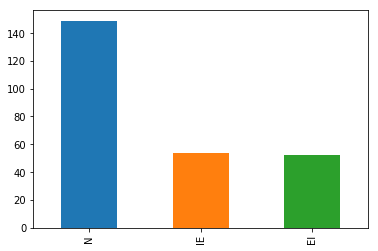

In [36]:
y_test.value_counts().plot.bar()
plt.show()

### ========== Question 2.8 ==========
What would be the accuracy of the classifier, if all points were labelled as `N`? 

**Pro Tip** - You should always use a ['Dummy Model'](http://scikit-learn.org/0.19/modules/model_evaluation.html#dummy-estimators) (a ridiculously simple model) like this to compare with your 'real' models. It's very common for complex models to be outperformed by a simple model, such as predicting the most common class. When complex models are outperformed by 'Dummies', you should investigate why: often there was an issue with the code, the data, or the way the model works was misunderstood.

In [63]:
dummyn = DummyClassifier(strategy='most_frequent')
dummyn.fit(X_train, y_train)
dummyn.score(X_test, y_test)

0.5843137254901961

### ========== Question 2.9 ==========
Now we want to explore the effect of the `k` parameter. To do this, train the classifier multiple times, each time setting the KNN option to a different value. Try `5`, `10`, `50`, `100`, `200`, `500`, `1000`, `1500` and `2000` and test the classifier on the test set. How does the k parameter effect the results? *Hint: Consider how well the classifier is generalising to previously unseen data, and how it compares to the dumb prediction accuracy.*

In [57]:
print('-' * 23)
print('{:<15s}{:<13s}'.format('# NEIGHBOURS','ACCURACY'))
print('-' * 23)

accs = []
ks = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]

for i in ks:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    acc = round(knn.score(X_test, y_test), 3)
    accs.append(acc)
    print('{:<15s}{:<13s}'.format(str(i),str(acc)))

-----------------------
# NEIGHBOURS   ACCURACY     
-----------------------
5              0.773        
10             0.812        
50             0.867        
100            0.886        
200            0.906        
500            0.949        
1000           0.965        
1500           0.698        
2000           0.584        


***Your answer goes here:*** *The accuracy increases from slightly better than the dummy at 5nn, to 96.5% accuracy at 1000nn, before peformance decreases rapidly for 1500, reaching the same as that of the dummy classifier at 2000nn.*

### ========== Question 2.10 ==========
Plot the results (k-value on the x-axis and classification accuracy on the y-axis), making sure to mark the axes. Can you conclude anything from observing the plot?

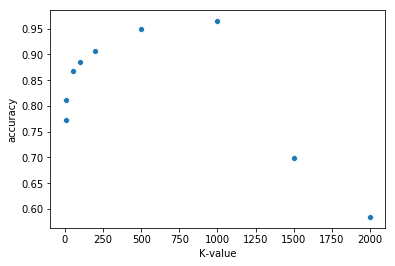

In [85]:
sns.scatterplot(ks, accs)
plt.xlabel('K-value')
plt.ylabel('accuracy')
plt.show()

***Your answer goes here:*** *Evidently more neighbours generally means better accuracy, until too many neighbours are used which greatly reduces accuracy.*

### ========== Question 2.11 ==========
Select best value for `k` from Questions 2.9 and 2.10 and plot the normalised confusion matrix on the test set (you may use the provided function). Then plot the confusion matrix for a 5-nearest neighbour classifier. What do you observe?

In [74]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

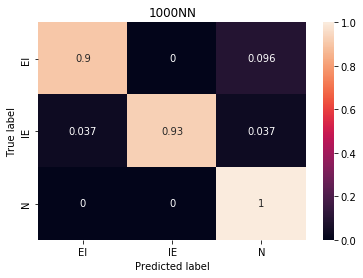

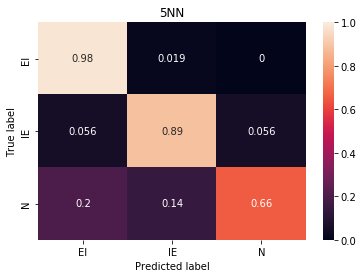

In [76]:
# Using K=1000 as the number of neighbours
knn = KNeighborsClassifier(n_neighbors=1000)
knn.fit(X_train, y_train)
test_pred = knn.predict(X_test)
conf = confusion_matrix(y_test, test_pred)
conf = conf/[[sum(conf[i])] for i in range(len(conf))]
plot_confusion_matrix(conf, classes=np.unique(y_test), title='1000NN')
plt.show()

# Using K=5 as the number of neighbours
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
test_pred = knn.predict(X_test)
conf = confusion_matrix(y_test, test_pred)
conf = conf/[[sum(conf[i])] for i in range(len(conf))]
plot_confusion_matrix(conf, classes=np.unique(y_test), title='5NN')
plt.show()

***Your answer goes here:*** *The classifier works much better with 1000NN than 5NN, most notably in the classifiation of 'N'.*

### ========== Question 2.12 ==========
Read about the [logarithimic loss](http://scikit-learn.org/0.19/modules/generated/sklearn.metrics.log_loss.html) (or cross-entropy loss). It is often the error metric used when we are trying to optimise classification models.

This metric takes as input the true labels and the estimated probability distributions (bernouli or multinomial). It makes sense to use this metric when we are interested not only in the predicted labels, but also in the confidence with which these labels are predicted.

For instance, think of the situation where you have a single test point and two classifiers. Both classifiers predict the label correctly, however classifier A predicts that the test point belongs to the class with probability 0.55, whereas classifier B predicts the correct class with probability 0.99. Classification accuracy would be the same for the two classifiers (why?) but the `log_loss` metric would indicate that classifier B should be favoured.

Produce a scatter plot similar to the one in Question 2.10 but this time show `log_loss` on your y axis. Which value for `k` would you pick if `log_loss` was the error metric? Comment on why this might happen, and which metric would be a better evaluator of performance.

-----------------------
# NEIGHBOURS   ACCURACY     
-----------------------
5              1.098749665258065
10             0.48269823951654434
50             0.5295699221124731
100            0.5575541329984139
200            0.6010940389068344
500            0.670927600876827
1000           0.754663389026571
1500           0.8177287055931994
2000           0.8753647883393483


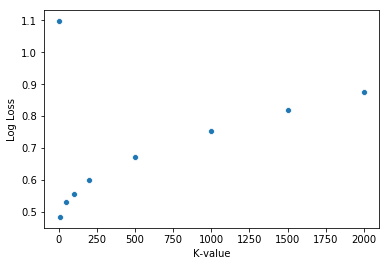

In [86]:
print('-' * 23)
print('{:<15s}{:<13s}'.format('# NEIGHBOURS','ACCURACY'))
print('-' * 23)

lls = []
ks = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]

for i in ks:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_pred = knn.predict_proba(X_test)
    ll = log_loss(y_true=y_test, y_pred=test_pred)
    lls.append(ll)
    print('{:<15s}{:<13s}'.format(str(i), str(ll)))

sns.scatterplot(ks, lls)
plt.xlabel('K-value')
plt.ylabel('Log Loss')
plt.show()

***Your answer goes here:*** *I would choose K=10 as this gives he lowest log-loss. The 10NN model, while it gets more instances wrong (lower accuracy), has a better judgement of its confidence in the prediction, whereas the 1000NN model gets more instances right (higher accuracy), but its judgement is way off (for example, in instances where it gets it wrong, it may predict the wrong label with high confidence, impacting the log loss).*

### ========== Question 2.13 ==========

Could you use the `log_loss` metric to evaluate the performance of an SVM classifier? Explain.

***Your answer goes here:*** *You shouldn't as SVM does not use probability to classify, it simply tries to minimise a distance metric.*